In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('agriculture.csv')
df.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


In [3]:
df.shape

(4599, 10)

In [4]:
df=df.drop(['ID'],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4599 non-null   int64  
 1   Crop_Type                4599 non-null   int64  
 2   Soil_Type                4599 non-null   int64  
 3   Pesticide_Use_Category   4599 non-null   int64  
 4   Number_Doses_Week        4599 non-null   int64  
 5   Number_Weeks_Used        4157 non-null   float64
 6   Number_Weeks_Quit        4599 non-null   int64  
 7   Season                   4599 non-null   int64  
 8   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 323.5 KB


In [6]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [7]:
df.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [8]:
#fillinf null values with the mean
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(),inplace=True)

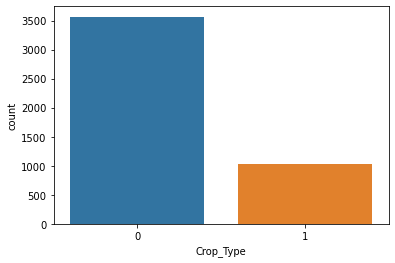

0    3565
1    1034
Name: Crop_Type, dtype: int64




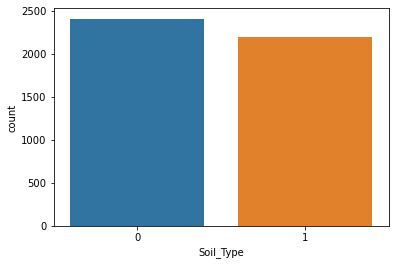

0    2407
1    2192
Name: Soil_Type, dtype: int64




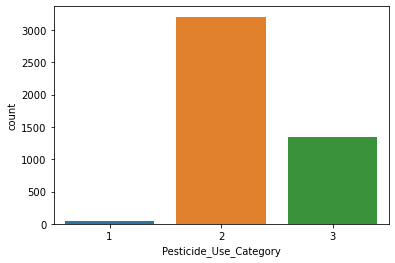

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64




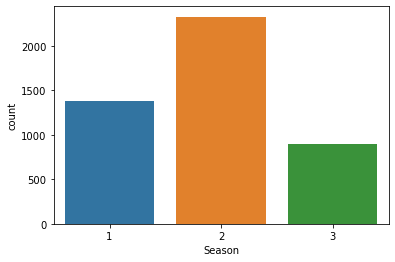

2    2327
1    1379
3     893
Name: Season, dtype: int64




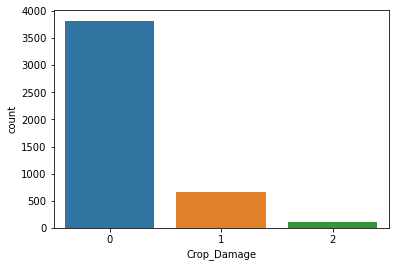

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64




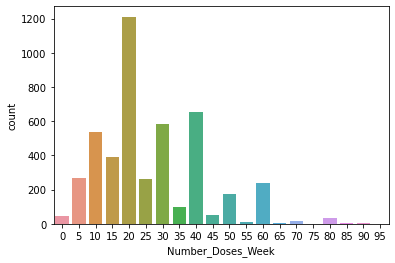

20    1211
40     657
30     584
10     537
15     393
5      268
25     263
60     237
50     172
35     101
45      53
0       45
80      36
70      17
55      11
90       5
85       4
65       3
75       1
95       1
Name: Number_Doses_Week, dtype: int64




In [9]:
for k in ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season','Crop_Damage','Number_Doses_Week']:
    plt.subplots(figsize=(6,4))
    sn.countplot(x=k,data=df)
    plt.show()
    print(df[k].value_counts())
    print('\n')

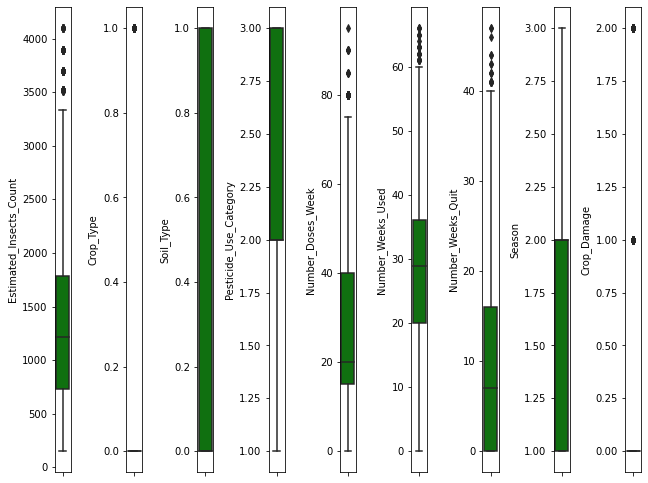

In [10]:
collist=df.columns.values
ncol=20
nrows=15
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sn.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [11]:
df1=df.drop(['Crop_Damage'],axis=1)

In [12]:
#Removing outliers
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))
threshold=3
df2=df[(z<3).all(axis=1)]
df2.shape, df.shape

((4482, 9), (4599, 9))

In [13]:
df2['Crop_Damage'].value_counts()

0    3731
1     639
2     112
Name: Crop_Damage, dtype: int64

In [14]:
df2['Crop_Type'].value_counts()

0    3467
1    1015
Name: Crop_Type, dtype: int64

In [15]:
df2.skew()

Estimated_Insects_Count    0.786548
Crop_Type                  1.307543
Soil_Type                  0.087574
Pesticide_Use_Category     0.692099
Number_Doses_Week          0.701792
Number_Weeks_Used          0.264546
Number_Weeks_Quit          0.834440
Season                     0.143579
Crop_Damage                2.327404
dtype: float64

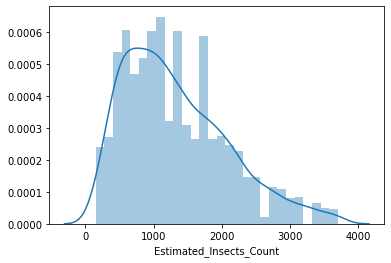

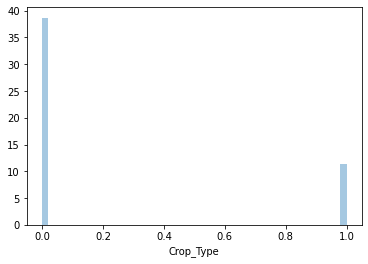

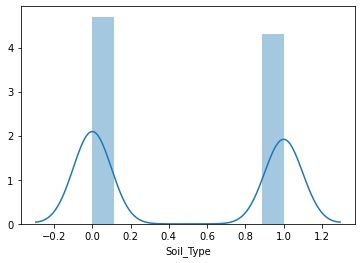

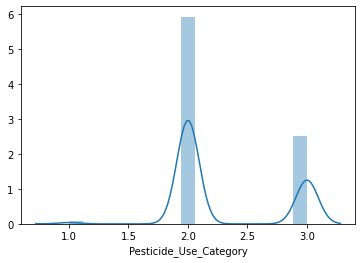

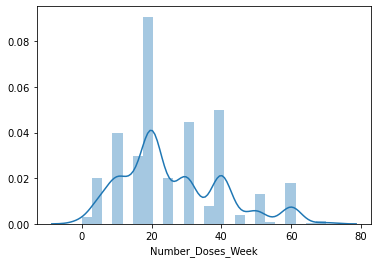

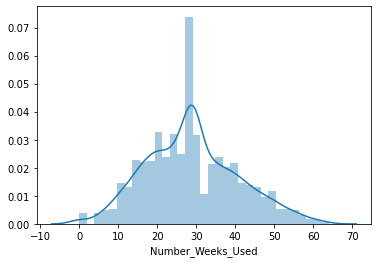

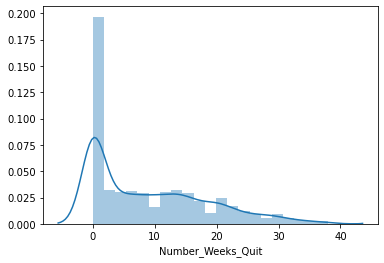

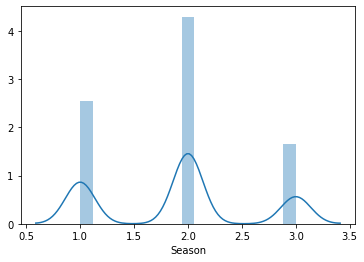

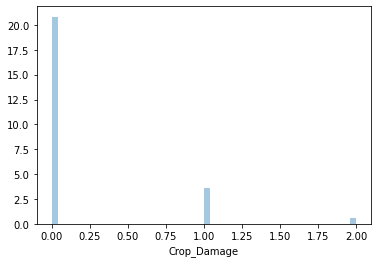

In [16]:
for col in df2.describe().columns:
    sn.distplot(df2[col])
    plt.show()

In [17]:
#removing skewness from the columns with continous data
df2['Number_Weeks_Quit']=np.sqrt(df2['Number_Weeks_Quit'])
df2['Estimated_Insects_Count']=np.sqrt(df2['Estimated_Insects_Count'])
df2['Number_Doses_Week']=np.sqrt(df2['Number_Doses_Week'])

In [18]:
df2.skew()

Estimated_Insects_Count    0.176504
Crop_Type                  1.307543
Soil_Type                  0.087574
Pesticide_Use_Category     0.692099
Number_Doses_Week         -0.124212
Number_Weeks_Used          0.264546
Number_Weeks_Quit          0.032944
Season                     0.143579
Crop_Damage                2.327404
dtype: float64

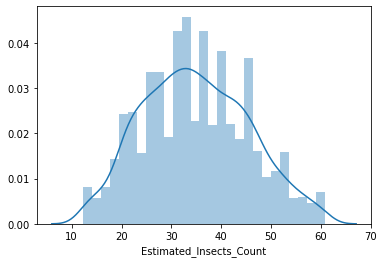

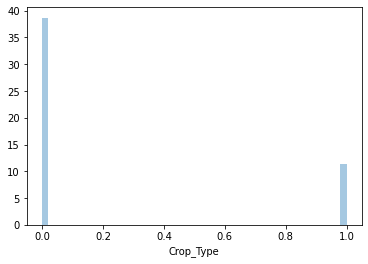

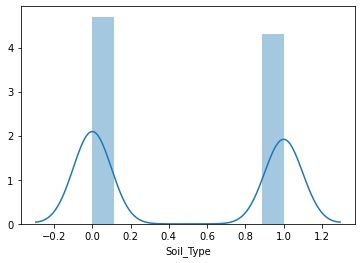

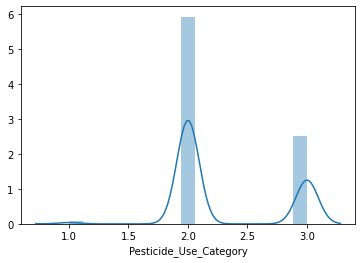

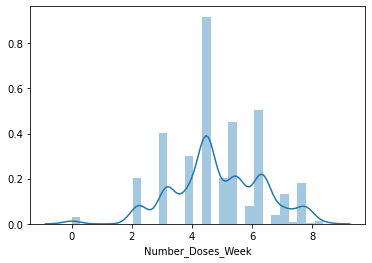

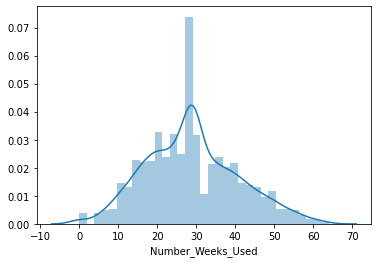

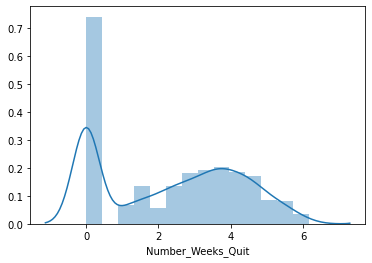

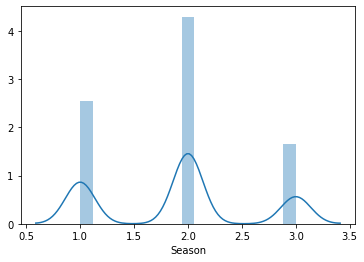

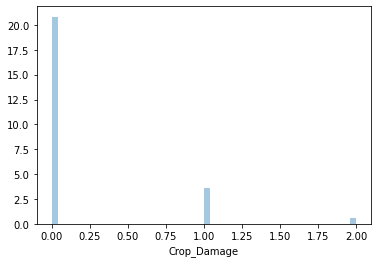

In [19]:
for col in df2.describe().columns:
    sn.distplot(df2[col])
    plt.show()

In [20]:
x=df2.drop(['Crop_Damage'],axis=1)
y=df2['Crop_Damage']

In [21]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sx=sc.fit_transform(x)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [23]:
best_rstate=0
accu=0
for i in range(30,200):
    train_x,test_x,train_y,test_y=train_test_split(sx,y,test_size=0.2,random_state=i)
    svc=SVC()
    svc.fit(train_x,train_y)
    pred=svc.predict(test_x)
    temp_acc=accuracy_score(test_y,pred)
    if temp_acc>accu:
        accu=temp_acc
        best_rstate=i

print(f'Best accuracy {accu*100} found on random_state {best_rstate}')

Best accuracy 87.84838350055742 found on random_state 103


In [24]:
train_x,test_x,train_y,test_y=train_test_split(sx,y,test_size=0.2,random_state=103)

models=[LogisticRegression(),SVC(kernel='rbf'),SVC(kernel='linear'),SVC(kernel='poly'),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for v in models:
    v.fit(train_x,train_y)
    predv=v.predict(test_x)
    cvscore=cross_val_score(v,sx,y,cv=3)
    print(v)
    print(accuracy_score(test_y,predv))
    print('cv_score', cvscore.mean())
    print(confusion_matrix(test_y,predv))
    print(classification_report(test_y,predv))
    print('\n')

LogisticRegression()
0.8717948717948718
cv_score 0.8270861222668451
[[772   9   0]
 [ 86  10   0]
 [ 18   2   0]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       781
           1       0.48      0.10      0.17        96
           2       0.00      0.00      0.00        20

    accuracy                           0.87       897
   macro avg       0.45      0.36      0.37       897
weighted avg       0.82      0.87      0.83       897



SVC()
0.8784838350055741
cv_score 0.8295403837572511
[[777   4   0]
 [ 85  11   0]
 [ 19   1   0]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.94       781
           1       0.69      0.11      0.20        96
           2       0.00      0.00      0.00        20

    accuracy                           0.88       897
   macro avg       0.52      0.37      0.38       897
weighted avg       0.84      0.88      0.84       897



SVC(kernel='linear')


In [25]:
#Hypertuning
parameter={'kernel':['rbf','linear','poly'],'C':[0.1,1,10]}

In [26]:
gcv=GridSearchCV(SVC(),parameter)
gcv.fit(train_x,train_y)
gcv.best_estimator_
gcv_pred=gcv.best_estimator_.predict(test_x)
print('accuracy_score', accuracy_score(test_y,gcv_pred))

accuracy_score 0.8784838350055741


In [28]:
import pickle
file='agriculture.pkl'
pickle.dump(gcv,open(file,'wb'))